In [108]:
import pandas as pd
import numpy as np
import seaborn as sns
import pylab
import scipy.stats as stats
import warnings
import matplotlib.pyplot as plt
import pandas_profiling as pp

In [3]:
df=pd.read_csv('E:/datasets/Olympic Dataset-2022/Medals_Standing.csv')

# Olympic 2022 held in Beijing,People's Republic of China

In [6]:
df

,NOC,Gold,Silver,Bronze,Total
0,Norway,16,8,13,37
1,Germany,12,10,5,27
2,People's Republic of China,9,4,2,15
3,United States of America,8,10,7,25
4,Sweden,8,5,5,18
5,Netherlands,8,5,4,17
6,Austria,7,7,4,18
7,Switzerland,7,2,5,14
8,ROC,6,12,14,32
9,France,5,7,2,14


In [7]:
df.groupby(['Gold','Silver','Bronze'])['NOC'].max()

Gold  Silver  Bronze
0     0       1                             Poland
      1       0                            Ukraine
      2       0                            Belarus
1     0       1                           Slovakia
              2                            Hungary
      1       0                      Great Britain
      2       1                          Australia
2     1       0                        New Zealand
      2       4                            Finland
      3       2                           Slovenia
      5       2                  Republic of Korea
      7       8                              Italy
3     6       9                              Japan
4     8       14                            Canada
5     7       2                             France
6     12      14                               ROC
7     2       5                        Switzerland
      7       4                            Austria
8     5       4                        Netherlands
          

<AxesSubplot:xlabel='NOC', ylabel='Gold'>

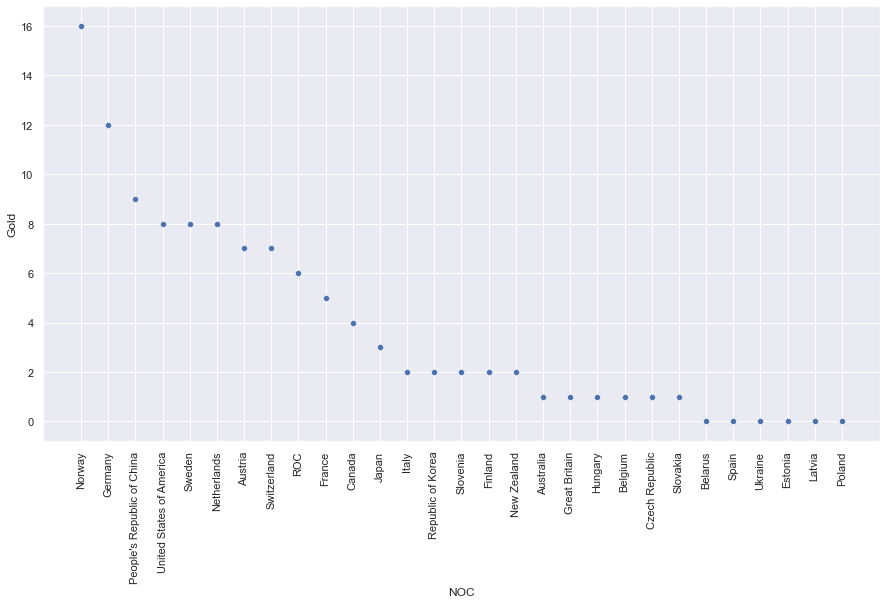

In [21]:
# Countries With Total Gold Medal
plt.xticks(rotation=90)
sns.set(rc = {'figure.figsize':(15,8)})
sns.scatterplot(x='NOC',y='Gold',data=df)

<AxesSubplot:xlabel='NOC', ylabel='Silver'>

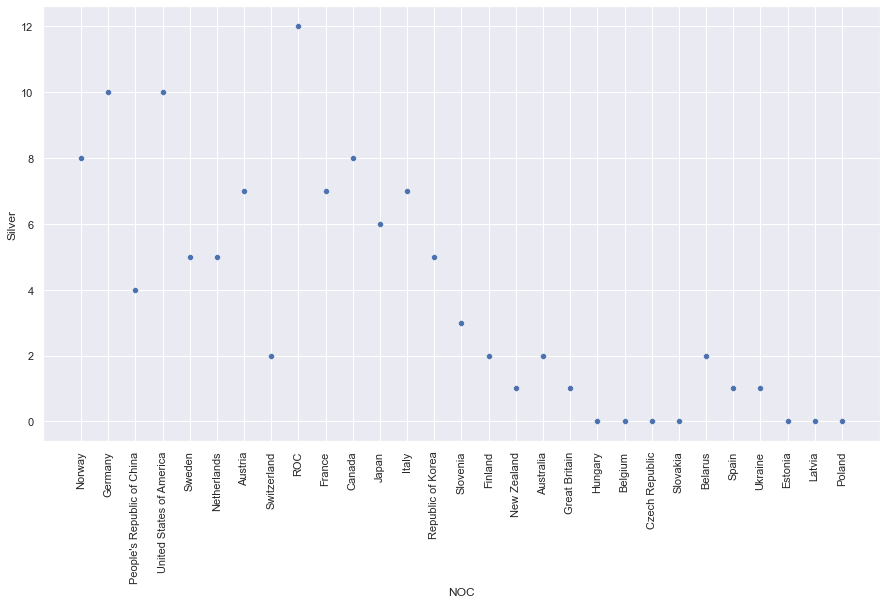

In [30]:
# Countries with Total Silver Medals
plt.xticks(rotation=90)
sns.set(rc = {'figure.figsize':(15,8)})
sns.scatterplot(x='NOC',y='Silver',data=df)

<AxesSubplot:xlabel='Gold', ylabel='count'>

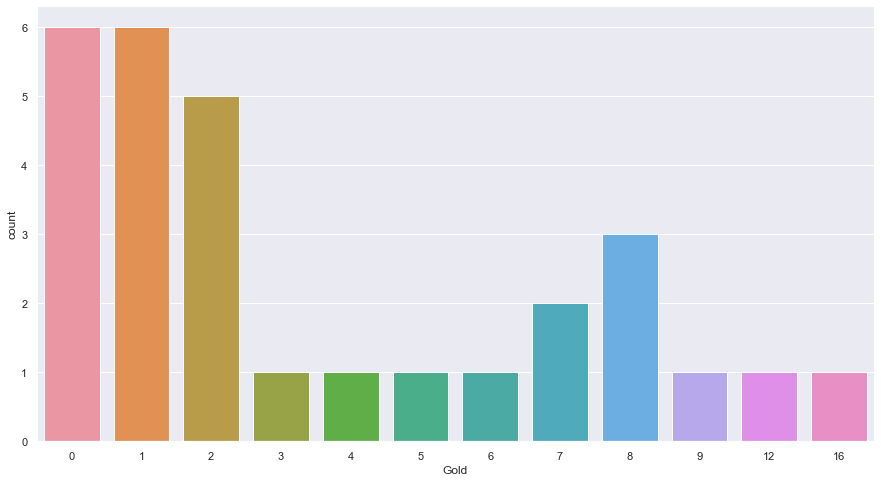

In [51]:
sns.countplot(x='Gold',data=df)

In [56]:
print(sum(df['Gold']))
print(sum(df['Silver']))
print(sum(df['Bronze']))
print(sum(df['Total']))

109
109
109
327


In [31]:
df1=pd.read_csv('E:/datasets/Olympic Dataset-2022/Medalists.csv')

In [32]:
df1

,NAME,NOC,SPORTS,EVENT,MEDAL
0,STROLZ Johannes,Austria,Alpine Skiing,Men's Alpine Combined,Gold
1,FEUZ Beat,Switzerland,Alpine Skiing,Men's Downhill,Gold
2,ODERMATT Marco,Switzerland,Alpine Skiing,Men's Giant Slalom,Gold
3,MAYER Matthias,Austria,Alpine Skiing,Men's Super-G,Gold
4,NOEL Clement,France,Alpine Skiing,Men's Slalom,Gold
...,...,...,...,...,...
689,LOLLOBRIGIDA Francesca,Italy,Speed Skating,Women's Mass Start,Bronze
690,de JONG Antoinette,Netherlands,Speed Skating,Women's Team Pursuit,Bronze
691,GROENEWOUD Marijke,Netherlands,Speed Skating,Women's Team Pursuit,Bronze
692,SCHOUTEN Irene,Netherlands,Speed Skating,Women's Team Pursuit,Bronze


In [33]:
df1['NAME'].value_counts()

BOE Johannes Thingnes     5
FILLON MAILLET Quentin    5
BOLSHUNOV Alexander       5
ROEISELAND Marte Olsbu    5
TAKAGI Miho               4
                         ..
GASSER Anna               1
ANDRONOV Sergei           1
TRUPPE Katharina          1
HOLTMANN Mina Fuerst      1
SWINGS Bart               1
Name: NAME, Length: 551, dtype: int64

In [40]:
df1.groupby(['NOC','SPORTS'])['EVENT'].value_counts()

NOC                        SPORTS             EVENT                       
 Australia                  Freestyle Skiing  Women's Moguls                  1
                            Skeleton          Women                           1
                            Snowboard         Men's Snowboard Halfpipe        1
                                              Women's Snowboard Slopestyle    1
 Austria                    Alpine Skiing     Mixed Team Parallel             6
                                                                             ..
 United States of America   Snowboard         Women's Snowboard Halfpipe      1
                                              Women's Snowboard Slopestyle    1
                            Speed Skating     Men's Team Pursuit              4
                                              Women's 1000m                   1
                                              Women's 500m                    1
Name: EVENT, Length: 294, dtype: int64

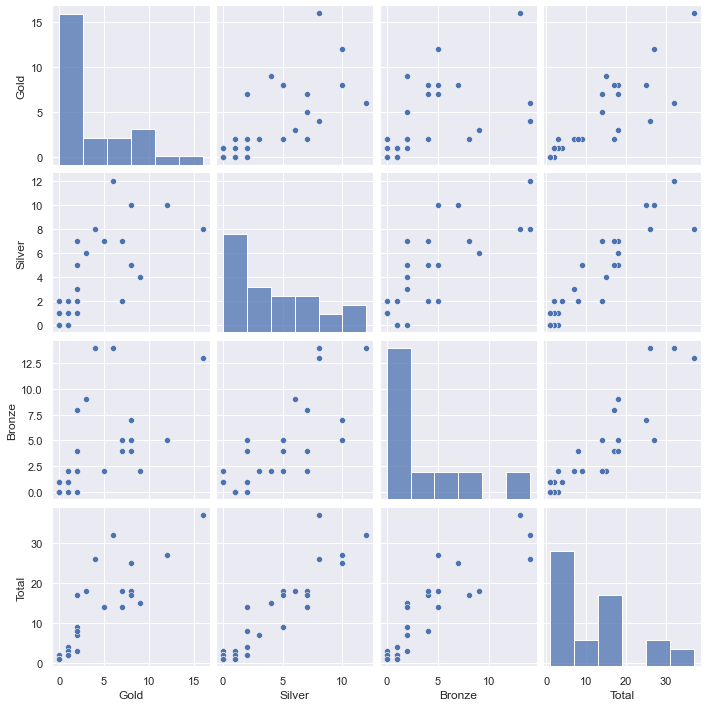

In [41]:
sns.pairplot(df)

In [60]:
df1['MEDAL'].value_counts()

Bronze    233
Silver    232
Gold      229
Name: MEDAL, dtype: int64

In [62]:
df1.groupby(['NAME','EVENT'])['MEDAL'].max()

NAME                 EVENT                         
AALTONEN Miro        Men                                 Gold
ABRAMENKO Oleksandr  Men's Aerials                     Silver
AICHER Emma          Mixed Team Parallel               Silver
ALDOSHKIN Daniil     Men's Team Pursuit                Silver
ALTHAUS Katharina    Women's Normal Hill Individual    Silver
                                                        ...  
de JONG Antoinette   Women's 1500m                     Bronze
                     Women's Team Pursuit              Bronze
van KERKHOF Yara     Women's 3000m Relay                 Gold
van der POEL Nils    Men's 10000m                        Gold
                     Men's 5000m                         Gold
Name: MEDAL, Length: 694, dtype: object

<AxesSubplot:xlabel='MEDAL', ylabel='Count'>

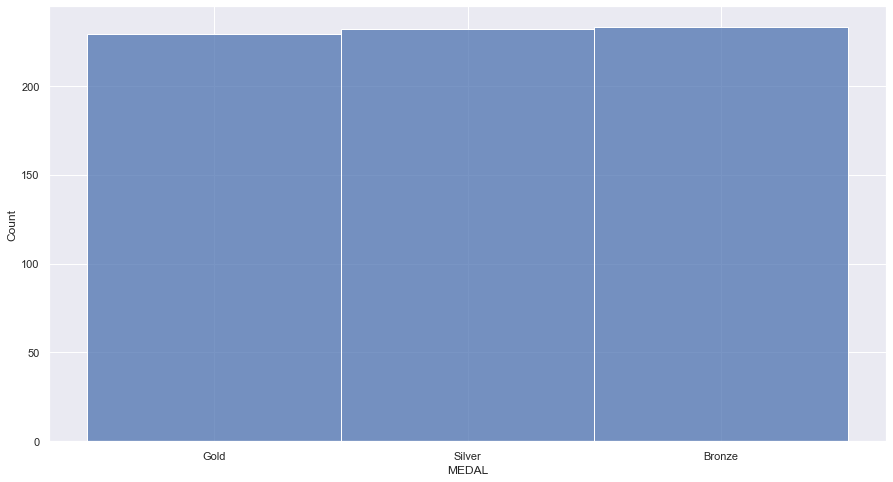

In [71]:
sns.histplot(df1['MEDAL'])

In [74]:
df1.groupby(['MEDAL','EVENT'])['NAME'].value_counts()

MEDAL   EVENT                        NAME               
Bronze  2-man                        HAFER Christoph        1
                                     SOMMER Matthias        1
        2-woman                      HOFFMAN Sylvia         1
                                     MEYERS TAYLOR Elana    1
        4-man                        COAKWELL Benjamin      1
                                                           ..
Silver  Women's Team Pursuit         SATO Ayano             1
                                     TAKAGI Miho            1
                                     TAKAGI Nana            1
        Women's Team Sprint Classic  DAHLQVIST Maja         1
                                     SUNDLING Jonna         1
Name: NAME, Length: 694, dtype: int64

In [79]:
df1.groupby(['EVENT'])['SPORTS'].value_counts()

EVENT                         SPORTS               
2-man                          Bobsleigh                6
2-woman                        Bobsleigh                6
4-man                          Bobsleigh               12
Doubles                        Luge                     6
Ice Dance                      Figure Skating           6
                                                       ..
Women's Snowboard Slopestyle   Snowboard                3
Women's Sprint Free            Cross-Country Skiing     3
Women's Super-G                Alpine Skiing            3
Women's Team Pursuit           Speed Skating           10
Women's Team Sprint Classic    Cross-Country Skiing     6
Name: SPORTS, Length: 109, dtype: int64

In [80]:
# TYPES OF EVENTS IN EACH SPORTS
df1.groupby(['SPORTS'])['EVENT'].value_counts()

SPORTS          EVENT                
 Alpine Skiing  Mixed Team Parallel      17
                Men's Alpine Combined     3
                Men's Downhill            3
                Men's Giant Slalom        3
                Men's Slalom              3
                                         ..
 Speed Skating  Women's 1500m             3
                Women's 3000m             3
                Women's 5000m             3
                Women's 500m              3
                Women's Mass Start        3
Name: EVENT, Length: 109, dtype: int64

In [81]:
df2=pd.read_csv('E:\datasets\Olympic Dataset-2022/Olympic Schedule.csv')

In [83]:
df2

,Ceremonies,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,Unnamed: 20
0,Ceremonies,-,-,Ceremonies,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,Ceremonies,NaN
1,Alpine-Skiing,-,Competition-Day,Competition-Day,Competition-Day,-,Day-with-medals,Day-with-medals,Day-with-medals,Day-with-medals,...,Competition-Day,Day-with-medals,Competition-Day,Day-with-medals,Day-with-medals,Day-with-medals,-,Day-with-medals,-,
2,Biathlon,-,-,-,Day-with-medals,-,Day-with-medals,Day-with-medals,-,-,...,Day-with-medals,Day-with-medals,-,Day-with-medals,Day-with-medals,-,Day-with-medals,-,-,NaN
3,Bobsleigh,-,-,-,-,-,-,-,-,Competition-Day,...,Competition-Day,Competition-Day,Day-with-medals,Day-with-medals,Competition-Day,Competition-Day,Competition-Day,Day-with-medals,Day-with-medals,NaN
4,Cross-Country-Skiing,-,-,-,Day-with-medals,Day-with-medals,-,Day-with-medals,-,Day-with-medals,...,Day-with-medals,Day-with-medals,-,-,Day-with-medals,-,-,Day-with-medals,Day-with-medals,NaN
5,Curling,Competition-Day,Competition-Day,Competition-Day,Competition-Day,Competition-Day,Competition-Day,Day-with-medals,Competition-Day,Competition-Day,...,Competition-Day,Competition-Day,Competition-Day,Competition-Day,Competition-Day,Competition-Day,Day-with-medals,Day-with-medals,Day-with-medals,NaN
6,Figure-Skating,-,-,Competition-Day,-,Competition-Day,Day-with-medals,Competition-Day,-,Day-with-medals,...,Competition-Day,-,Day-with-medals,Competition-Day,-,Day-with-medals,Competition-Day,Day-with-medals,-,NaN
7,Freestyle-Skiing,-,Competition-Day,-,Day-with-medals,Day-with-medals,Competition-Day,Day-with-medals,Day-with-medals,Day-with-medals,...,-,-,Day-with-medals,Day-with-medals,Day-with-medals,Day-with-medals,Day-with-medals,Day-with-medals,-,NaN
8,Ice-Hockey,-,Competition-Day,Competition-Day,Competition-Day,Competition-Day,Competition-Day,Competition-Day,Competition-Day,Competition-Day,...,Competition-Day,Competition-Day,Competition-Day,Competition-Day,Day-with-medals,Day-with-medals,Competition-Day,Day-with-medals,Day-with-medals,NaN
9,Luge,Competition-Day,Competition-Day,Competition-Day,Competition-Day,Day-with-medals,Competition-Day,Day-with-medals,Day-with-medals,Day-with-medals,...,-,-,-,-,-,-,-,-,-,NaN


In [84]:
df2.isnull().sum()/df2.shape[0]*100

Ceremonies     55.555556
2              52.777778
3              47.222222
4              50.000000
5              50.000000
6              50.000000
7              52.777778
8              52.777778
9              52.777778
10             52.777778
11             52.777778
12             55.555556
13             55.555556
14             55.555556
15             55.555556
16             55.555556
17             55.555556
18             55.555556
19             55.555556
20             55.555556
Unnamed: 20    97.222222
dtype: float64

<AxesSubplot:>

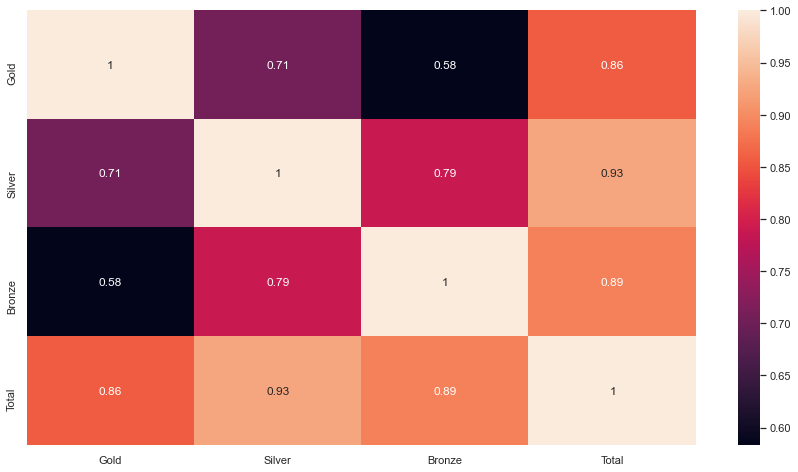

In [85]:
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:>

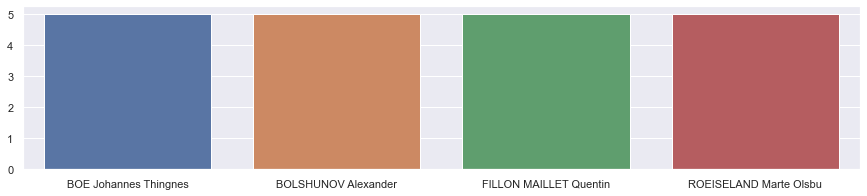

In [88]:
d={}
for i in list((df1.groupby('NAME'))):
    d[(i[0])]=i[1]['MEDAL'].count()
x1={}
for i in d:
    if(d[i]==max(d.values())):
        x1[i]=max(d.values())
plt.figure(figsize=(15,3))
sns.barplot(x=list(x1.keys()),y=list(x1.values()))

In [90]:
d=[1,2,3,11,2,3,3,4,2]
{i:d.count(i) for i in d}

{1: 1, 2: 3, 3: 3, 11: 1, 4: 1}

In [96]:
x=list(df1['MEDAL'])

In [101]:
a={i:x.count(i) for i in x}
print(a.keys())
print(a.values())

dict_keys(['Gold', 'Silver', 'Bronze'])
dict_values([229, 232, 233])


In [105]:
for i in a.items():
    print(i[-1],end=',')

229,232,233,

In [111]:
r=pp.ProfileReport(df1)


In [112]:
r

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [114]:
len(df1['NOC'].unique())

29